<a href="https://colab.research.google.com/github/sazzy438/Class_Notes/blob/main/11_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Two popular ways to represent a graph in a program:
# Adjacency Matrix and Adjacency List

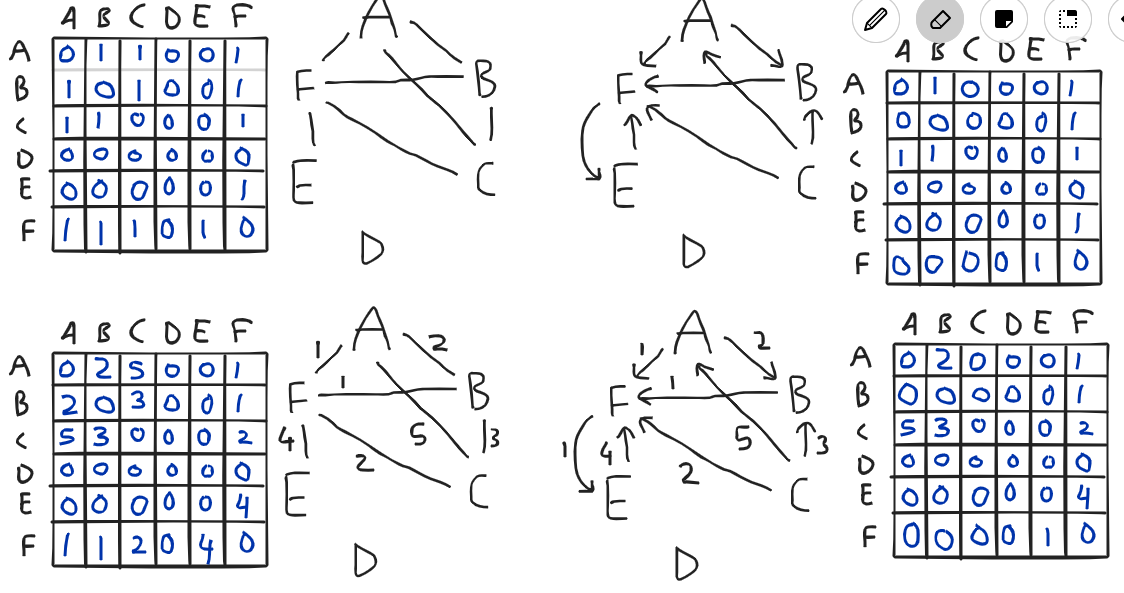

In [ ]:
adjmat = [[0, 1, 1, 0, 0, 1],
          [1, 0, 1, 0, 0, 1],
          [1, 1, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 1],
          [1, 1, 1, 0, 1, 0]]

#print (adjmat)
for row in adjmat:
  print (*row)

# do we have the edge BD?
print (adjmat[1][3])

A, B, C, D, E, F = range (6)    # A = 0, B = 1, C = 2, etc

print (adjmat[B][D])

0 1 1 0 0 1
1 0 1 0 0 1
1 1 0 0 0 1
0 0 0 0 0 0
0 0 0 0 0 1
1 1 1 0 1 0
0
0


In [ ]:
class GraphAdjacencyMatrixUndirectedUnweighted:
  def __init__ (self, nv):
    self.numVertices = nv
    self.mat = []
    for i in range (nv):
      row = [0] * nv
      self.mat.append (row)

  def show (self):
    for row in self.mat:
      print (*row)
    print ()

  # return True if edge (u, v) exists in the graph, or False otherwise
  def checkedge (self, u, v):
    #return self.mat[u][v] != 0
    if self.mat[u][v] == 0:
      return False
    else:
      return True

  # add the edge (u, v) to the graph
  # assume that the edge (u, v) does not already exist
  def addedge (self, u, v):
    self.mat[u][v] = 1
    self.mat[v][u] = 1

  # remove the edge (u, v) from the graph
  # assume that the edge (u, v) already exists
  def deleteedge (self, u, v):
    self.mat[u][v] = 0
    self.mat[v][u] = 0

  def getdegree (self, u):
    cnt = 0
    for elem in self.mat[u]:
      if elem != 0:
        cnt += 1
    return cnt

  def countedges (self):
    # add up all the vertex degrees, then divide by 2
    sm = 0
    # len (self.mat) is the number of vertices in the graph
    for u in range (len (self.mat)):
      sm += self.getdegree (u)
    return sm // 2



In [ ]:
A, B, C, D, E, F = range (6)

g1 = GraphAdjacencyMatrixUndirectedUnweighted (6)

g1.addedge (A, B)
g1.addedge (A, C)
g1.addedge (A, F)
g1.addedge (B, C)
g1.addedge (F, B)
g1.addedge (C, F)
g1.addedge (E, F)

g1.show ()

print (g1.getdegree (A))    # 3
print (g1.getdegree (B))    # 3
print (g1.getdegree (C))    # 3
print (g1.getdegree (D))    # 0
print (g1.getdegree (E))    # 1
print (g1.getdegree (F))    # 4

print (g1.countedges ())

0 1 1 0 0 1
1 0 1 0 0 1
1 1 0 0 0 1
0 0 0 0 0 0
0 0 0 0 0 1
1 1 1 0 1 0

3
3
3
0
1
4
7


In [ ]:
class GraphAdjacencyMatrixDirectedUnweighted:
  def __init__ (self, nv):
    self.numVertices = nv
    self.mat = []
    for i in range (nv):
      row = [0] * nv
      self.mat.append (row)

  def show (self):
    for row in self.mat:
      print (*row)
    print ()

  def checkedge (self, u, v):
    return self.mat[u][v] != 0

  def addedge (self, u, v):
    self.mat[u][v] = 1
    # don't add the backwards edge

  def deleteedge (self, u, v):
    self.mat[u][v] = 0
    # don't remove the backwards edge

  def getoutdegree (self, u):
    cnt = 0
    for elem in self.mat[u]:
      if elem != 0:
        cnt += 1
    return cnt

  def getindegree (self, v):
    cnt = 0
    # for every vertex u, check if edge (u, v) exists
    for u in range (len (self.mat)):
      if self.checkedge (u, v):
        cnt += 1
    return cnt

  def countedges (self):
    sm = 0
    for u in range (len (self.mat)):
      sm += self.getoutdegree (u)
    return sm     # do not divide by 2

In [ ]:
class GraphAdjacencyMatrixUndirectedWeighted:
  def __init__ (self, nv):
    self.numVertices = nv
    self.mat = []
    for i in range (nv):
      row = [0] * nv
      self.mat.append (row)

  def show (self):
    for row in self.mat:
      print (*row)
    print ()

  def checkedge (self, u, v):
    return self.mat[u][v] != 0

  def addedge (self, u, v, wgt):
    self.mat[u][v] = wgt
    self.mat[v][u] = wgt

  def deleteedge (self, u, v):
    self.mat[u][v] = 0
    self.mat[v][u] = 0

  # return the weight of edge (u, v)
  # assume that edge (u, v) exists
  def getweight (self, u, v):
    return self.mat[u][v]

  def getdegree (self, u):
    cnt = 0
    for elem in self.mat[u]:
      if elem != 0:
        cnt += 1
    return cnt

  def countedges (self):
    sm = 0
    for u in range (len (self.mat)):
      sm += self.getdegree (u)
    return sm // 2

In [ ]:
class GraphAdjacencyMatrixDirectedWeighted:
  def __init__ (self, nv):
    self.numVertices = nv
    self.mat = []
    for i in range (nv):
      row = [0] * nv
      self.mat.append (row)

  def show (self):
    for row in self.mat:
      print (*row)
    print ()

  def checkedge (self, u, v):
    return self.mat[u][v] != 0

  def addedge (self, u, v, wgt):
    self.mat[u][v] = wgt

  def deleteedge (self, u, v):
    self.mat[u][v] = 0

  def getweight (self, u, v):
    return self.mat[u][v]

  def getoutdegree (self, u):
    cnt = 0
    for elem in self.mat[u]:
      if elem != 0:
        cnt += 1
    return cnt

  def getindegree (self, v):
    cnt = 0
    # for every vertex u, check if edge (u, v) exists
    for u in range (len (self.mat)):
      if self.checkedge (u, v):
        cnt += 1
    return cnt

  def countedges (self):
    sm = 0
    for u in range (len (self.mat)):
      sm += self.getoutdegree (u)
    return sm

In [ ]:
# Another way to represent a graph is to
# use an Adjacency List

In [ ]:
A, B, C, D, E, F = range (6)  # A = 0, B = 1, etc

adjlst = [[B, C, F],
          [A, F, C],
          [A, B, F],
          [],
          [F],
          [A, B, C, E]]

#print (adjlst)
for row in adjlst:
  print (row)

[1, 2, 5]
[0, 5, 2]
[0, 1, 5]
[]
[5]
[0, 1, 2, 4]


In [ ]:
# Instead of a list of lists, we can
# alternatively use a dictionary of
# lists, and this also allows us to
# represent the vertices as other
# types, e.g., strings

dictadjlst = {"A": ["B", "C", "F"],
              "B": ["A", "F", "C"],
              "C": ["A", "B", "F"],
              "D": [],
              "E": ["F"],
              "F": ["A", "B", "C", "E"]}

print (dictadjlst["B"])

#print (dictadjlst)
for k in dictadjlst:
  print ("Neighbors of", k, "are", dictadjlst[k])

['A', 'F', 'C']
Neighbors of A are ['B', 'C', 'F']
Neighbors of B are ['A', 'F', 'C']
Neighbors of C are ['A', 'B', 'F']
Neighbors of D are []
Neighbors of E are ['F']
Neighbors of F are ['A', 'B', 'C', 'E']


In [ ]:
class GraphAdjacencyListUndirectedUnweighted:
  def __init__ (self, nv):
    self.numVertices = nv
    self.lst = []
    for i in range (nv):
      row = []
      self.lst.append (row)

  def show (self, base = "A"):
    for row in self.lst:
      charlst = []
      for elem in row:
        chcode = ord (base) + elem
        ch = chr (chcode)
        charlst.append (ch)
      print (charlst)
    print ()

  # return True if edge (u, v) exists in the graph, or False otherwise
  def checkedge (self, u, v):
    return v in self.lst[u]

  # add the edge (u, v) to the graph
  # assume that the edge (u, v) does not already exist
  def addedge (self, u, v):
    self.lst[u].append (v)
    self.lst[v].append (u)

  # remove the edge (u, v) from the graph
  # assume that the edge (u, v) already exists
  def deleteedge (self, u, v):
    self.lst[u].remove (v)
    self.lst[v].remove (u)

  def getdegree (self, u):
    return len (self.lst[u])

  def countedges (self):
    sm = 0
    for u in range (len (self.lst)):
      sm += self.getdegree (u)
    return sm // 2

In [ ]:
A, B, C, D, E, F = range (6)

g2 = GraphAdjacencyListUndirectedUnweighted (6)

g2.addedge (A, B)
g2.addedge (A, C)
g2.addedge (A, F)
g2.addedge (B, C)
g2.addedge (F, B)
g2.addedge (C, F)
g2.addedge (E, F)

g2.show ()

print (g2.getdegree (A))    # 3
print (g2.getdegree (B))    # 3
print (g2.getdegree (C))    # 3
print (g2.getdegree (D))    # 0
print (g2.getdegree (E))    # 1
print (g2.getdegree (F))    # 4

print (g2.countedges ())    # 7

['B', 'C', 'F']
['A', 'C', 'F']
['A', 'B', 'F']
[]
['F']
['A', 'B', 'C', 'E']

3
3
3
0
1
4
7


In [ ]:
class GraphAdjacencyListDirectedUnweighted:
  def __init__ (self, nv):
    self.numVertices = nv
    self.lst = []
    for i in range (nv):
      row = []
      self.lst.append (row)

  def show (self, base = "A"):
    for row in self.lst:
      charlst = []
      for elem in row:
        chcode = ord (base) + elem
        ch = chr (chcode)
        charlst.append (ch)
      print (charlst)
    print ()

  def checkedge (self, u, v):
    return v in self.lst[u]

  def addedge (self, u, v):
    self.lst[u].append (v)

  def deleteedge (self, u, v):
    self.lst[u].remove (v)

  def getoutdegree (self, u):
    return len (self.lst[u])

  def getindegree (self, v):
    cnt = 0
    # for every vertex u, check if edge (u, v) exists
    for u in range (len (self.lst)):
      if self.checkedge (u, v):
        cnt += 1
    return cnt

  def countedges (self):
    sm = 0
    for u in range (len (self.lst)):
      sm += self.getoutdegree (u)
    return sm

In [ ]:
diradjlst = [[(B, 2), (C, 5), (F, 1)],
             [(A, 2), (F, 1), (C, 3)],
             [(A, 5), (B, 3), (F, 2)],
             [],
             [(F, 4)],
             [(A, 1), (B, 1), (C, 2), (E, 4)]]

for row in diradjlst:
  print (row)

[(1, 2), (2, 5), (5, 1)]
[(0, 2), (5, 1), (2, 3)]
[(0, 5), (1, 3), (5, 2)]
[]
[(5, 4)]
[(0, 1), (1, 1), (2, 2), (4, 4)]


In [ ]:
dictdiradjlst = {"A": [("B", 2), ("C", 5), ("F", 1)],
                 "B": [("A", 2), ("F", 1), ("C", 3)],
                 "C": [("A", 5), ("B", 3), ("F", 2)],
                 "D": [],
                 "E": [("F", 4)],
                 "F": [("A", 1), ("B", 1), ("C", 2), ("E", 4)]}

for k in dictdiradjlst:
  print ("Neighbors of", k, "are", dictdiradjlst[k])

Neighbors of A are [('B', 2), ('C', 5), ('F', 1)]
Neighbors of B are [('A', 2), ('F', 1), ('C', 3)]
Neighbors of C are [('A', 5), ('B', 3), ('F', 2)]
Neighbors of D are []
Neighbors of E are [('F', 4)]
Neighbors of F are [('A', 1), ('B', 1), ('C', 2), ('E', 4)]


In [ ]:
class GraphAdjacencyListUndirectedWeighted:
  def __init__ (self, nv):
    self.numVertices = nv
    self.lst = []
    for i in range (nv):
      row = []
      self.lst.append (row)

  def show (self, base = "A"):
    for row in self.lst:
      charlst = []
      for nbr, wgt in row:
        chcode = ord (base) + nbr
        ch = chr (chcode)
        charlst.append ((ch, wgt))
      print (charlst)
    print ()

  # return True if edge (u, v) exists in the graph, or False otherwise
  def checkedge (self, u, v):
    for (nbr, wgt) in self.lst[u]:
      if nbr == v:
        return True
    return False

  # return the weight of edge (u, v)
  # assume that the edge (u, v) exists
  def getweight (self, u, v):
    for (nbr, wgt) in self.lst[u]:
      if nbr == v:
        return wgt

  # add the edge (u, v) to the graph with weight wgt
  # assume that the edge (u, v) does not already exist
  def addedge (self, u, v, wgt):
    self.lst[u].append ((v, wgt))
    self.lst[v].append ((u, wgt))

  # remove the edge (u, v) from the graph
  # assume that the edge (u, v) already exists
  def deleteedge (self, u, v):
    wgt = self.getweight (u, v)
    self.lst[u].remove ((v, wgt))
    self.lst[v].remove ((u, wgt))

  def getdegree (self, u):
    return len (self.lst[u])

  def countedges (self):
    sm = 0
    for u in range (len (self.lst)):
      sm += self.getdegree (u)
    return sm // 2

In [ ]:
A, B, C, D, E, F = range (6)

g3 = GraphAdjacencyListUndirectedWeighted (6)

g3.addedge (A, B, 2)
g3.addedge (A, C, 5)
g3.addedge (A, F, 1)
g3.addedge (B, C, 3)
g3.addedge (F, B, 1)
g3.addedge (C, F, 2)
g3.addedge (E, F, 4)

g3.show ()

print (g3.getdegree (A))    # 3
print (g3.getdegree (B))    # 3
print (g3.getdegree (C))    # 3
print (g3.getdegree (D))    # 0
print (g3.getdegree (E))    # 1
print (g3.getdegree (F))    # 4

print (g3.countedges ())    # 7

[('B', 2), ('C', 5), ('F', 1)]
[('A', 2), ('C', 3), ('F', 1)]
[('A', 5), ('B', 3), ('F', 2)]
[]
[('F', 4)]
[('A', 1), ('B', 1), ('C', 2), ('E', 4)]

3
3
3
0
1
4
7


In [ ]:
class GraphAdjacencyListDirectedWeighted:
  def __init__ (self, nv):
    self.numVertices = nv
    self.lst = []
    for i in range (nv):
      row = []
      self.lst.append (row)

  def show (self, base = "A"):
    for row in self.lst:
      charlst = []
      for nbr, wgt in row:
        chcode = ord (base) + nbr
        ch = chr (chcode)
        charlst.append ((ch, wgt))
      print (charlst)
    print ()

  def checkedge (self, u, v):
    for (nbr, wgt) in self.lst[u]:
      if nbr == v:
        return True
    return False

  def getweight (self, u, v):
    for (nbr, wgt) in self.lst[u]:
      if nbr == v:
        return wgt

  def addedge (self, u, v, wgt):
    self.lst[u].append ((v, wgt))

  def deleteedge (self, u, v):
    wgt = self.getweight (u, v)
    self.lst[u].remove ((v, wgt))

  def getoutdegree (self, u):
    return len (self.lst[u])

  def getindegree (self, v):
    cnt = 0
    for u in range (len (self.lst)):
      if self.checkedge (u, v):
        cnt += 1
    return cnt

  def countedges (self):
    sm = 0
    for u in range (len (self.lst)):
      sm += self.getoutdegree (u)
    return sm